In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.4f}'.format
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
%load_ext autoreload
%autoreload 2
%matplotlib inline

from perturbseq import *

# Generating figure

Load model fits from *GI_model_fits*

In [2]:
regr_fits = pd.read_csv('./data_sharing/regr_fits_final.csv', index_col=[0])

In [3]:
regr_fits['min_dcor'] = regr_fits[['dcor_first', 'dcor_second']].min(axis=1)
regr_fits['max_dcor'] = regr_fits[['dcor_first', 'dcor_second']].max(axis=1)
regr_fits['dcor_ratio'] = regr_fits['min_dcor']/regr_fits['max_dcor']

In [4]:
xs = [regr_fits['ts_norm2'], regr_fits['abs_log_ts_ratio'], regr_fits['ts_linear_dcor']]
ys = [regr_fits['dcor'], regr_fits['dcor_singles'], regr_fits['dcor_ratio']]

In [5]:
x_table = regr_fits[['ts_norm2', 'abs_log_ts_ratio', 'ts_linear_dcor',]].copy()
x_table = (x_table)/x_table.std()
y_table = regr_fits[['dcor', 'dcor_singles', 'dcor_ratio']].copy()
y_table = (y_table)/y_table.std()

c = regr_fits['emap'].fillna(0)

My simple and somewhat janky library for making onesense plots... No warranties!

In [6]:
from onesense import *

To get a good embedding we embedded the data many times and checked coherence with the underlying transcriptional data by choosing the embeddings with the highest distance correatlion. We manually selected the number of clusters based on a tradeoff between interpretability and granularity (i.e. do not subdivide so much that every interaction is unique, and do not average so much that the clusters were not informative).

In [7]:
# x, x_random_state, x_random_scores = optimal_umap(x_table, 10000, n_jobs=24, n_components=1, n_neighbors=5, min_dist=0.05, spread=0.5)
# y, y_random_state, y_random_scores = optimal_umap(y_table, 10000, n_jobs=24, n_components=1, n_neighbors=5, min_dist=0.05, spread=0.5)

# import cPickle as pickle

# pickle.dump(x_random_scores, open('./storage/x_random_scores_5_neighbors_min_dist005_spread_05.pickle', 'wb'))
# pickle.dump(y_random_scores, open('./storage/y_random_scores_5_neighbors_min_dist005_spread_05.pickle', 'wb'))

# x, rx = minimize_clusters(x_random_scores, 8)
# y, ry = minimize_clusters(y_random_scores, 7)

# x = pd.Series(x.flatten(), index=regr_fits.index).astype(float)
# y = pd.Series(y.flatten(), index=regr_fits.index).astype(float)

These are the particular random states we used. I am manually regenerating the embeddings here.

In [8]:
rx = 3008336
ry = 4103310

from onesense import _test_umap

x, _, dx = _test_umap(x_table, rx, n_components=1, n_neighbors=5, min_dist=0.05, spread=0.5)
y, _, dy = _test_umap(y_table, ry, n_components=1, n_neighbors=5, min_dist=0.05, spread=0.5)

x = pd.Series(x.flatten().astype(float), index=x_table.index)
y = pd.Series(y.flatten().astype(float), index=y_table.index)

/home/tmn/.local/lib/python2.7/site-packages/dcor/_utils.py:88: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  return ((np.issubdtype(x.dtype, float) and


In [9]:
cdict = {'red':((0.0,0.125,0.125),
                (0.5,0.0,0.0),
                (1.0,0.957,0.957)),
        'green':((0.0,0.713,0.713),
                (0.5,0.0,0.0),
                (1.0,0.918,0.918)),
        'blue': ((0.0,0.886,0.886),
                (0.5,0.0,0.0),
                (1.0,0.094,0.094))}
blue_yellow = matplotlib.colors.LinearSegmentedColormap('BlueYellow',cdict)
blue_yellow.set_bad((.9, .9, .9, 1.0))
plt.register_cmap(cmap=blue_yellow)

Large figure with all interactions labeled

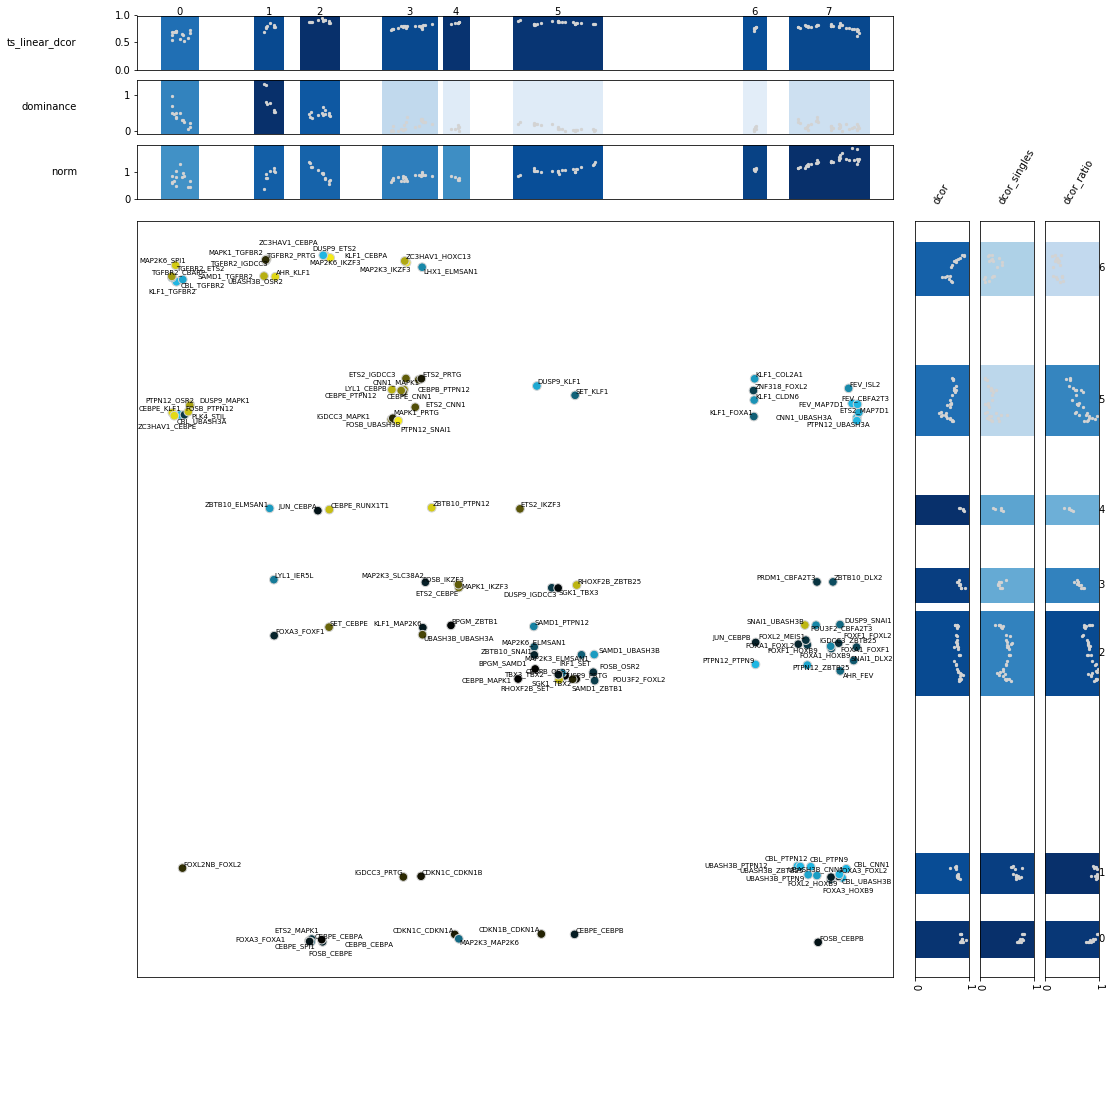

In [10]:
cx, cy = onesense(x, -y, c, xs, ys, cmaps=['Blues', 'Blues', 'Blues', 'Blues'], s=75, scatter_cmap='BlueYellow',
        xlabels=['norm', 'dominance', 'ts_linear_dcor'], ylabels=['dcor', 'dcor_singles', 'dcor_ratio'],
                  label=True,
                  figsize=[15,15], ylims=((0, 1), (0, 1), (0, 1)))
plt.savefig('./figures/epistasis_types_all_labeled_big.pdf', bbox_inches='tight')

For making the figure we made three versions with specific clusters labeled...

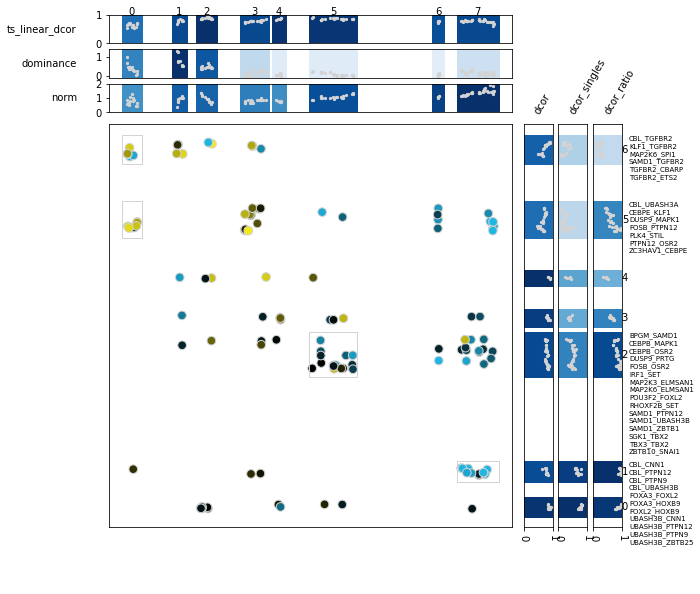

In [11]:
cx, cy = onesense(x, -y, c, xs, ys, cmaps=['Blues', 'Blues', 'Blues', 'Blues'], s=75, scatter_cmap='BlueYellow',
        xlabels=['norm', 'dominance', 'ts_linear_dcor'], ylabels=['dcor', 'dcor_singles', 'dcor_ratio'],
                  annotations=np.asarray([(0, 6), (0, 5), (5, 2), (7, 1)]),
                  figsize=[8,8], ylims=((0, 1), (0, 1), (0, 1)))
plt.savefig('./figures/epistasis_types_1.pdf', bbox_inches='tight')

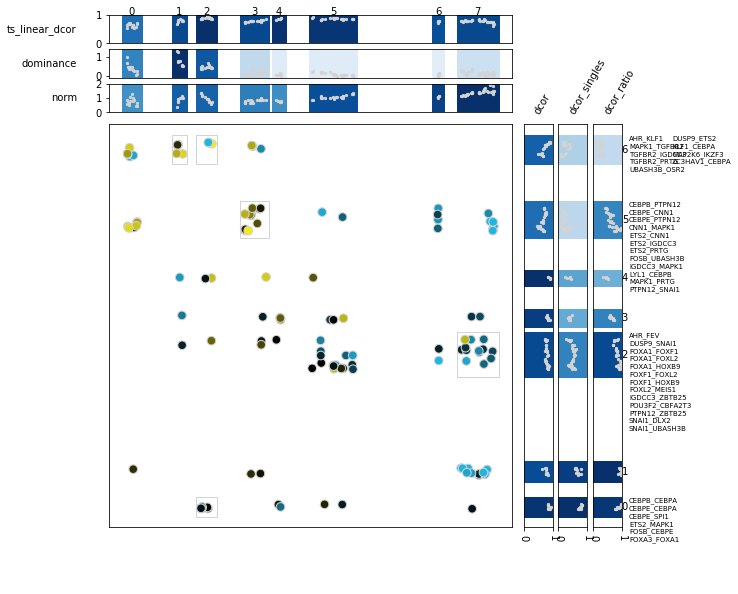

In [12]:
cx, cy = onesense(x, -y, c, xs, ys, cmaps=['Blues', 'Blues', 'Blues', 'Blues'], s=75, scatter_cmap='BlueYellow',
        xlabels=['norm', 'dominance', 'ts_linear_dcor'], ylabels=['dcor', 'dcor_singles', 'dcor_ratio'],
                  annotations=np.asarray([(1, 6), (2, 6), (3, 5), (7, 2), (2, 0)]),
                  figsize=[8,8], ylims=((0, 1), (0, 1), (0, 1)))
plt.savefig('./figures/epistasis_types_2.pdf', bbox_inches='tight')

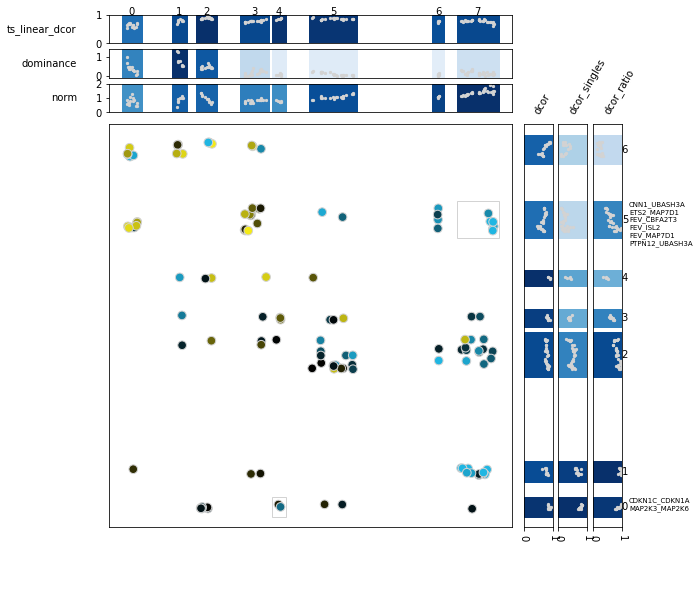

In [13]:
cx, cy = onesense(x, -y, c, xs, ys, cmaps=['Blues', 'Blues', 'Blues', 'Blues'], s=75, scatter_cmap='BlueYellow',
        xlabels=['norm', 'dominance', 'ts_linear_dcor'], ylabels=['dcor', 'dcor_singles', 'dcor_ratio'],
                  annotations=np.asarray([(7, 5), (4, 0)]),
                  figsize=[8,8], ylims=((0, 1), (0, 1), (0, 1)))
plt.savefig('./figures/epistasis_types_3.pdf', bbox_inches='tight')

# Features of linear interaction model

In [14]:
sns.set(font_scale=1.)

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

sns.set_style('white')

In [15]:
cm = plt.cm.get_cmap('cividis')

-0.7172371210884633


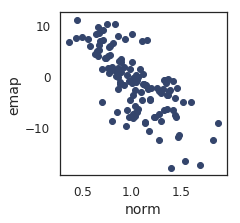

In [16]:
plt.figure(figsize=[3, 3])

plt.scatter(regr_fits['ts_norm2'],
            regr_fits['emap'],
            c=cm(50),
            cmap=cm, vmin=-10, vmax=10)
plt.xlabel('norm')
plt.ylabel('emap')
print regr_fits['emap'].corr(regr_fits['ts_norm2'])
plt.savefig('./figures/epistasis_model_emap_vs_tsnorm2.pdf', bbox_inches='tight')

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
regr = LinearRegression(fit_intercept=True)
regr.fit(regr_fits['emap'].values.reshape(-1, 1), regr_fits['ts_norm2'].values.reshape(-1, 1))

print('norm = {0:.3f}*emap + {1:.3f}'.format(regr.coef_[0][0], regr.intercept_[0]))

norm = -0.034*emap + 0.989


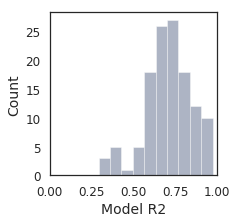

In [19]:
plt.figure(figsize=[3, 3])
sns.distplot(regr_fits['ts_score'],
            color=cm(50), norm_hist=False, kde=False)

plt.xlabel('Model R2')
plt.ylabel('Count')
plt.xlim([0, 1]);
plt.savefig('./figures/epistasis_model_explained_variance.pdf', bbox_inches='tight')

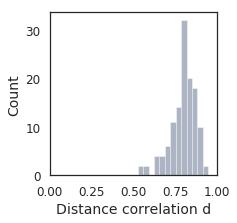

In [20]:
plt.figure(figsize=[3, 3])
sns.distplot(regr_fits['ts_linear_dcor'],
            color=cm(50), norm_hist=False, kde=False)

plt.xlabel('Distance correlation d')
plt.ylabel('Count')
plt.xlim([0, 1]);
plt.savefig('./figures/epistasis_model_distance_correlation.pdf', bbox_inches='tight')